In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [225]:
df = pd.read_csv('updated_dataset.csv')

In [226]:
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Active_2,Active_3,Weight_1,Weight_2,Weight_3,WeightA_1,WeightA_2,WeightA_3,rating_weight,order_history_weight
0,0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,...,8.50,0.57,0.0333,0.6810,0.4246,0.2295,0.0981,0.7873,0.1174,0.8826
1,1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,...,7.17,3.01,0.7062,0.4970,0.1646,0.8817,0.6491,0.2915,0.1376,0.8624
2,2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,...,3.67,15.45,0.2671,0.4017,0.4489,0.0169,0.1490,0.6837,0.4918,0.5082
3,3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,...,3.91,5.86,0.3889,0.3135,0.6792,0.3486,0.4534,0.1761,0.1172,0.8828
4,4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,...,8.60,8.08,0.9009,0.7517,0.2439,0.9174,0.6373,0.5774,0.8863,0.1137


In [227]:
# df = df.dropna(axis = 1)

In [228]:
df.shape

(45593, 42)

In [229]:
# df.columns

In [230]:
# df = df.drop(['ID', 'Delivery_person_Age', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 
#               'Type_of_order', 'multiple_deliveries', 'Festival', 'City'], axis = 1)

In [231]:
# df.columns

In [232]:
param = df[['Time_taken(min)',
       'Number of calls', 'Politeness', 'Freshness ', 'Temperature',
       'Maximum wait time']].to_numpy()

In [233]:
# param

In [234]:
# New formula 
# Update = (Maximum Wait Time - Time taken(min)) * 10 + Politeness * 5 + Freshness * 7 + Temperature * 6 + Number of Calls * 4
# Weights = [10, 5, 7, 6, 4]
# Number of calls would signify how many times the customer has to call a delivery person

In [235]:
# update - updates which are done in ratings on a scale on 1000. Will be scaled down to 1 eventually
update = np.empty((45593, 1), dtype = float)
for i in range(0, len(param)):
    update[i] = 10 * (param[i][5] - param[i][0]) + 5 * param[i][2] + 7 * param[i][3] + param[i][4] * 6 + 4 * param[i][1]
    
update.shape

(45593, 1)

In [236]:
# for i in range(0, len(update)):
#     print(update[i], "\n")

In [237]:
# Normalizing Customer Ratings
# Using Min-Max Normalization

normal_update = np.empty((45593, 1), dtype = float)
m = max(update)
n = min(update)
for i in range(0, len(param)):
    normal_update[i] = (m - update[i]) / (m - n)
    normal_update[i] = normal_update[i] * 5
    
# print(normal_update)
# print(max(normal_update))
# print(min(normal_update))

In [238]:
# Created in replacement of the Deliver_person_ID
id = np.empty((45593, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1

In [239]:
# param.shape

In [240]:
# param[5]

In [241]:
rat = df['Delivery_person_Ratings'].to_numpy()
rat = rat.astype(np.float64)
# print(rat.dtype)

In [242]:
# for i in range(0, len(updated_ratings)):
#     print(updated_ratings[i], "\n")

In [243]:
# Plotting previous ratings and updated ratings

In [244]:
# plt.bar(df['id'], df['Delivery_person_Ratings'])
# plt.bar(df['id'], df['updated_ratings'])

In [245]:
df['normal_update'] = normal_update
# df['updated_ratings'] = updated_ratings
# df['updated_ratings']
# df['id'] = id
# x = df['updated_ratings'] - df['Delivery_person_Ratings']
# max(x)
# min(x)

In [246]:
# Finding p factor
p = df['Weight_1'] * df['Order_1'] + df['Weight_2'] * df['Order_2'] + df['Weight_3'] * df['Order_3'] + df['WeightA_1'] * df['Active_1'] + df['WeightA_2'] * df['Active_2'] + df['WeightA_3'] * df['Active_3']

In [247]:
# Finding factor a

a = df['order_history_weight'] * p + df['rating_weight'] * df['normal_update']

In [248]:
print(max(a))
print(min(a))

26619.871570851163
2.170788613


In [249]:
for i in range(0, len(param)):
    update[i] = update[i] + (a[i] / 10000)
    
m = max(update)
n = min(update)
for i in range(0, len(param)):
    normal_update[i] = (m - update[i]) / (m - n)
    normal_update[i] = normal_update[i] * 5
    
df['normal_update'] = normal_update


In [250]:
# Updated Ratings of the rider
updated_ratings = np.empty((45593, 1), dtype = float)
for i in range(0, len(update)):
    updated_ratings[i] = rat[i] + (normal_update[i] / 10)
    if updated_ratings[i] > 5:
        updated_ratings[i] = 5
df['updated_ratings'] = updated_ratings

In [251]:
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Weight_1,Weight_2,Weight_3,WeightA_1,WeightA_2,WeightA_3,rating_weight,order_history_weight,normal_update,updated_ratings
0,0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,...,0.0333,0.6810,0.4246,0.2295,0.0981,0.7873,0.1174,0.8826,2.953069,5.000000
1,1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,...,0.7062,0.4970,0.1646,0.8817,0.6491,0.2915,0.1376,0.8624,3.060708,4.806071
2,2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,...,0.2671,0.4017,0.4489,0.0169,0.1490,0.6837,0.4918,0.5082,2.180068,4.618007
3,3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,...,0.3889,0.3135,0.6792,0.3486,0.4534,0.1761,0.1172,0.8828,2.574529,4.957453
4,4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,...,0.9009,0.7517,0.2439,0.9174,0.6373,0.5774,0.8863,0.1137,3.144037,4.914404


In [252]:
import random

In [253]:
sample_size = 15

In [254]:
# Sampling without replacement
sample = df.sample(n = sample_size)
# sample = sample.sort_values(by = ['updated_ratings'])

id = np.empty((sample_size, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1
sample['id'] = id
# data_sorted = sorted(zip(x, y), key=lambda x: x[1])
# sample

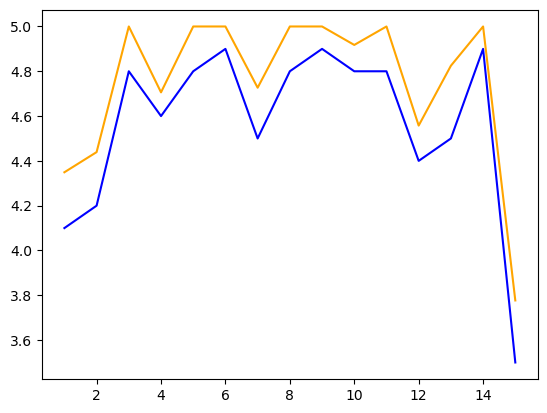

In [255]:
# Printing Line Chart
plt.plot(sample['id'], sample['Delivery_person_Ratings'], color = 'blue')
plt.plot(sample['id'], sample['updated_ratings'], color = 'orange')

In [256]:
# # Printing Bar Chart
# plt.bar(sample['id'], sample['Delivery_person_Ratings'], color = 'blue')
# plt.bar(sample['id'], sample['updated_ratings'], color = 'orange')

In [257]:
# Printing Machine Predicted Bid using rating as a parameter

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [259]:
X = pd.DataFrame(df.loc[:, ['Politeness', 'Temperature', 'Freshness ']])

In [260]:
# X

In [261]:
Y = df['Class']

In [262]:
# Y

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [264]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [265]:
y_pred = model.predict(X_test)
# y_pred

In [266]:
# Calculating the sigmoid
def sigmoid (value):
    return 1 / (1 + np.exp(-value))

In [267]:
# for i in range(0, len(percent_increase)):
#     print(percent_increase[i])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [268]:
Price = 1000
min_bid = 100
max_bid = 200
((max(sigmoid(updated_ratings / 5)) - 0.5) / 0.5) * 100 + 100

array([146.21171573])

In [269]:
bid = np.empty((45593, 1), dtype = float)
for i in range(0, len(bid)):
    x = sigmoid(updated_ratings[i])
    x = (x - 0.5) / 0.5
    bid[i] = x * (max_bid - min_bid) + min_bid
#     bid[i] = sigmoid(bid[i])
    
print(max(bid))

# bid = bid - min(bid)
bid = bid / max(bid)
bid = bid * max_bid

print(max(bid))
print(min(bid))
# for i in range(0, len(bid)):
#     bid[i] = bid[i] - min(bid)
#     bid[i] 

# bid = scaler.fit_transform(bid.reshape(-1, 1)).ravel()
# print(max(bid))
# print(min(bid))
# bid = sigmoid(bid)
# print(max(bid))
# print(min(bid))
# bid = (bid - 0.5) / 0.5
# print(max(bid))
# print(min(bid))
# bid = scaler.inverse_transform(bid.reshape(-1, 1)).ravel()

# print(max(bid))
# print(min(bid))

# a = (max_bid - min_bid) / (max(bid) - min(bid))
# b = min_bid - a * min(bid)

# for i in range(0, len(bid)):
#     bid[i] = a * bid[i] + b

[198.66142982]
[200.]
[101.15853084]


In [270]:
# Calculating the sigmoid of the update obtained in rating after applying the algorithm
percent_increase = np.empty((45593, 1), dtype = float)
for i in range(0, len(percent_increase)):
#     percent_increase[i] = sigmoid(updated_ratings[i] - rat[i])
    percent_increase[i] = sigmoid(updated_ratings[i])

In [271]:
# machine_bid indicating the bid predicted by the machine1
# Reason for 0.50. Machine predicted 
machine_bid = np.empty((45593, 1), dtype = float)
machine_bid = bid
c = 0
d = 0
# for i in range(0, len(machine_bid)):
# #     if percent_increase[i] > 0.5:
#     machine_bid[i] = df['initial_bid'][i] * (1 + percent_increase[i])
#     elif percent_increase[i] == 0.5:
#         machine_bid[i] = df['initial_bid'][i]
#         d = d + 1
#     else:
#         machine_bid[i] = df['initial_bid'][i] - df['initial_bid'][i] * percent_increase[i]
#         c = c + 1

In [272]:
# for i in range(0, len(machine_bid)):
#     print(machine_bid[i])
print(c, d)

0 0


In [273]:
df['machine_bid'] = machine_bid

In [274]:
# plt.plot(df['machine_bid'], df['updated_ratings'])
len(df)

45593

In [275]:
sample_size = len(df)
sample = df.sample(n = sample_size)

# change refers to the change in the rating of the rider

id = np.empty((sample_size, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1
sample['id'] = id
sample['change'] = sample['updated_ratings'] - sample['Delivery_person_Ratings']
sample = sample.sort_values(by = ['change'])
# data_sorted = sorted(zip(x, y), key=lambda x: x[1])
# sample

In [276]:
sample.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,WeightA_1,WeightA_2,WeightA_3,rating_weight,order_history_weight,normal_update,updated_ratings,machine_bid,id,change
13652,13652,0x434,RANCHIRES01DEL02,50,6.0,-23.416792,-85.316842,23.466792,85.366842,13-03-2022,...,0.8011,0.3646,0.3439,0.6721,0.3279,2.224031,5.0,200.0,10928,-1.0
42072,42072,0x5fc,INDORES11DEL03,50,6.0,22.751234,75.889490,22.781234,75.919490,17-03-2022,...,0.2577,0.0539,0.8827,0.2622,0.7378,2.388520,5.0,200.0,24876,-1.0
30579,30579,0xbf12,BHPRES20DEL03,50,6.0,23.235123,77.398886,23.325123,77.488886,16-02-2022,...,0.0194,0.5955,0.5951,0.5702,0.4298,2.846375,5.0,200.0,9515,-1.0
27221,27221,0x3f4,COIMBRES20DEL02,50,6.0,-10.994136,-76.963303,11.074136,77.043303,06-03-2022,...,0.5248,0.8309,0.7392,0.6666,0.3334,2.396246,5.0,200.0,34228,-1.0
38007,38007,0xbef2,DEHRES13DEL01,50,6.0,30.366322,78.070453,30.436322,78.140453,14-02-2022,...,0.6324,0.2229,0.7727,0.3951,0.6049,1.548927,5.0,200.0,15256,-1.0


In [277]:
# data = pd.DataFrame(columns = ['Rating', 'machine_bid'])
# j05 = 0
# j1 = 0
# j15 = 0
# j2 = 0
# j25 = 0
# j3 = 0
# j35 = 0
# j4 = 0
# j45 = 0
# j5 = 0
# for i in range(0, sample_size):
#     if sample.iloc[i, 34] <= 0.5 and j05 < 2:
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#         j05 += 1
#     elif sample.iloc[i, 34] <= 1 and sample.iloc[i, 34] > 0.5 and j1 < 2:
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#         j1 += 1
#     elif sample.iloc[i, 34] <= 1.5 and sample.iloc[i, 34] > 1 and  j15 < 2:
#         j15 += 1
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#     elif sample.iloc[i, 34] <= 2 and sample.iloc[i, 34] > 1.5 and j2 < 2:
#         j2 += 1
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#     elif sample.iloc[i, 34] <= 2.5 and sample.iloc[i, 34] > 2 and j25 < 2:
#         j25 += 1
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#     elif sample.iloc[i, 34] <= 3 and sample.iloc[i, 34] > 2.5 and j3 < 2:
#         j3 += 1
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#     elif sample.iloc[i, 34] <= 3.5 and sample.iloc[i, 34] > 3 and j35 < 2:
#         j35 += 1
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#     elif sample.iloc[i, 34] <= 4 and sample.iloc[i, 34] > 3.5 and j4 < 2:
#         j4 += 1
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#     elif sample.iloc[i, 34] <= 4.5 and sample.iloc[i, 34] > 4 and j45 < 2:
#         j45 += 1
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
#     elif sample.iloc[i, 34] <= 5 and j5 < 2:
#         j5 += 1
#         data = data.append({'Rating': sample.iloc[i, 34], 'machine_bid': sample.iloc[i, 35]}, ignore_index = True)
        
# print(min(df['updated_ratings']))

In [278]:
# data = data.sort_values(by = "Rating")
# data

In [279]:
# plt.plot(data['Rating'], data['machine_bid'], color = 'blue')
# plt.xlabel('Rating Change')
# plt.ylabel('Machine Predicted Bid')

Text(0, 0.5, 'Machine Predicted Bid')

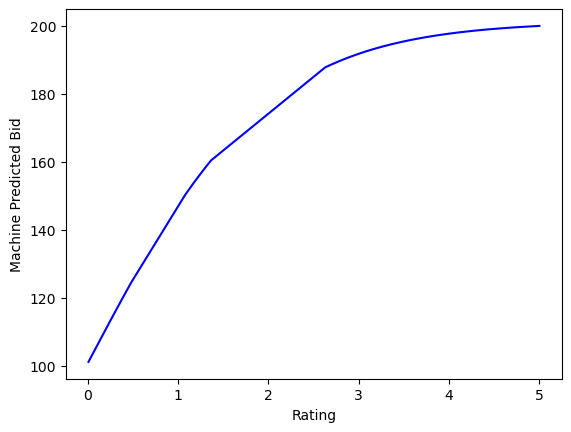

In [280]:
# x = sample('updated_ratings')
sample = sample.sort_values(by = 'updated_ratings')
plt.plot(sample['updated_ratings'], sample['machine_bid'], color = 'blue')
plt.xlabel('Rating')
plt.ylabel('Machine Predicted Bid')

In [281]:
sample.iloc[0, 34]

0.7211